# Notebook procesamiento de imágenes

In [1]:
import numpy as np
import cv2
import matplotlib.pylab as plt
from urllib.request import urlopen
from google.colab.patches import cv2_imshow
#Se carga imagen en linea
url = "https://placekittens.com/200/300"
url_response = urlopen (url)

#Convertir Matriz numpyarray:
img_array = np.asarray(bytearray(url_response.read()), dtype="uint8")
img = cv2.imdecode (img_array, cv2.IMREAD_GRAYSCALE)


#Convolución con un filtro promedio

A partir de un filtro promedio hacemos una convolucion sobre la imagen para suavizarla

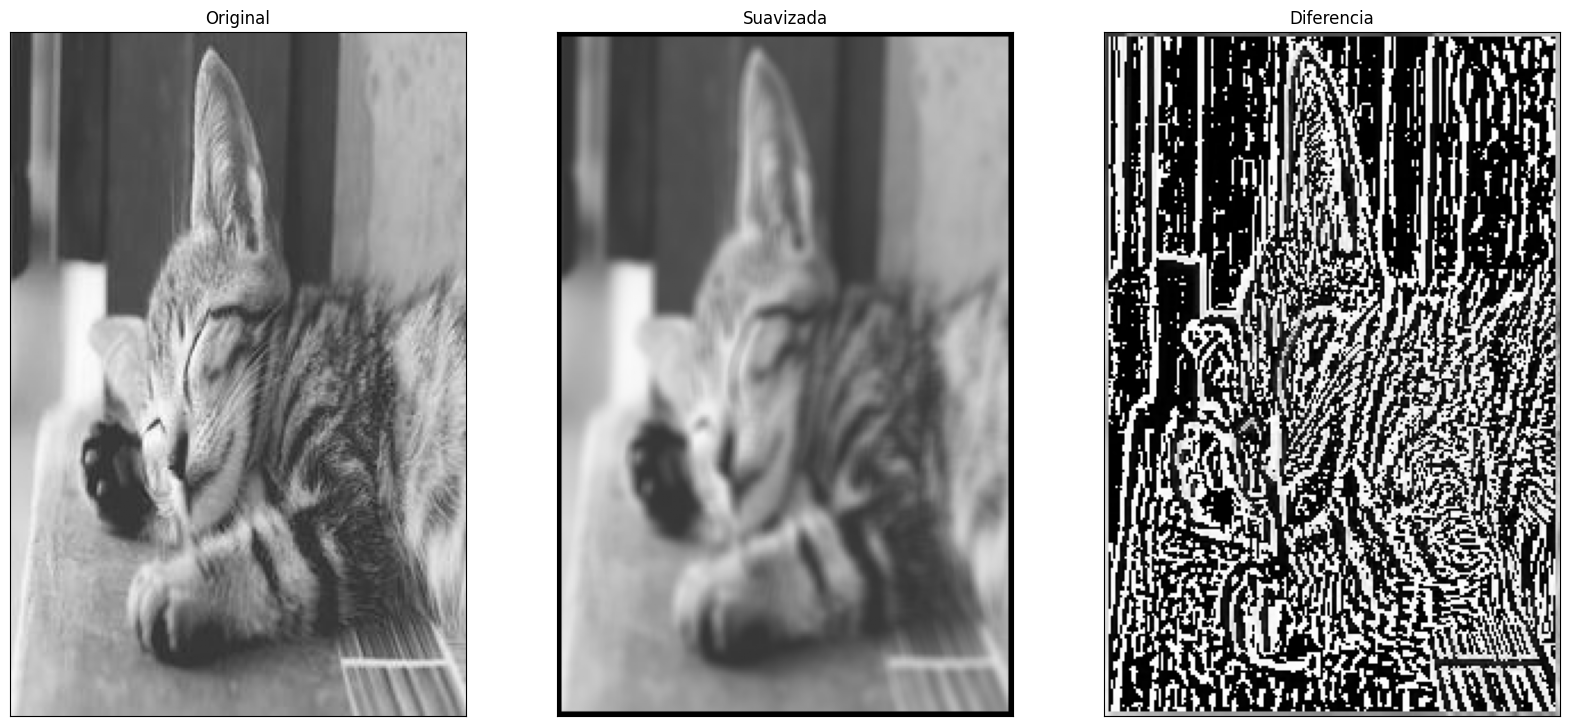

In [3]:


def miConvolucion(img, kernel):
  (img_row, img_col) = img.shape[:2]

  centro = kernel.shape[0] // 2

  res = np.zeros((img_row, img_col), np.uint8)
  #Convolución/correlación
  for ii in range(centro,img_row-centro):
    for jj in range(centro,img_col-centro):
      res[ii, jj] = np.uint8( np.sum(img[ii-centro:ii+centro+1, jj-centro:jj+centro+1]*kernel) )

  return res


def grafica3img(original, suavizada, txtOri='Original', txt2='Suavizada'):
  plt.figure(figsize=[20,20])
  plt.subplot(131),plt.imshow(original, cmap='gray', vmin=0, vmax=255)
  plt.title(txtOri)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132),plt.imshow(suavizada,cmap='gray', vmin=0, vmax=255),
  plt.title(txt2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133),plt.imshow(original-suavizada,cmap='gray', vmin=0, vmax=255),
  plt.title('Diferencia')
  plt.xticks([]), plt.yticks([])
  plt.show()



kernel_size = 5;
kernel = np.ones((kernel_size,kernel_size))
kernel = kernel/np.sum(kernel)



res = miConvolucion(img, kernel)
grafica3img(img, res)

#Operacion sobre los bordes

Como se comportara la imagen una vez que se corte o finalice la matriz de valores

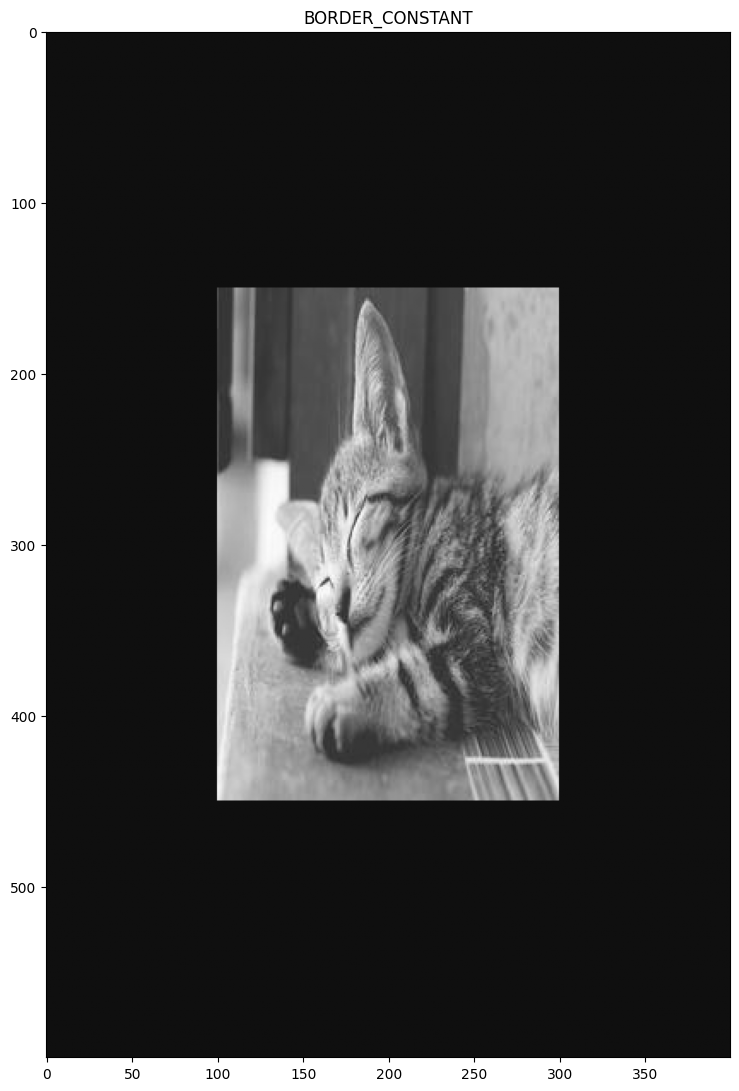

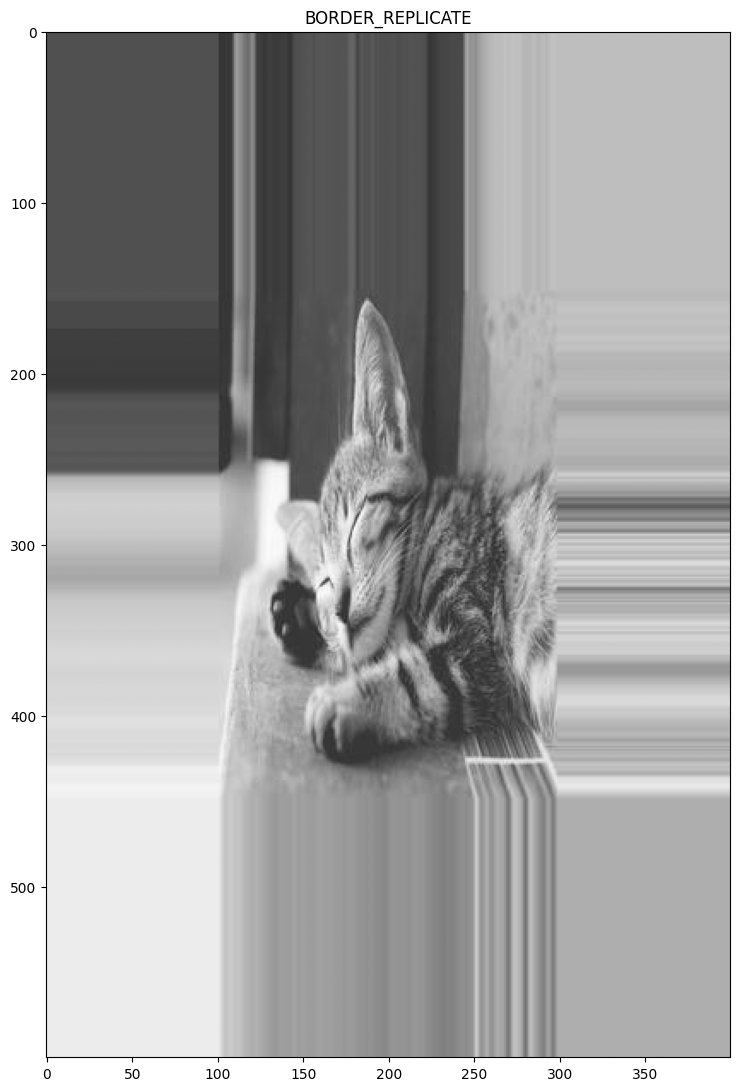

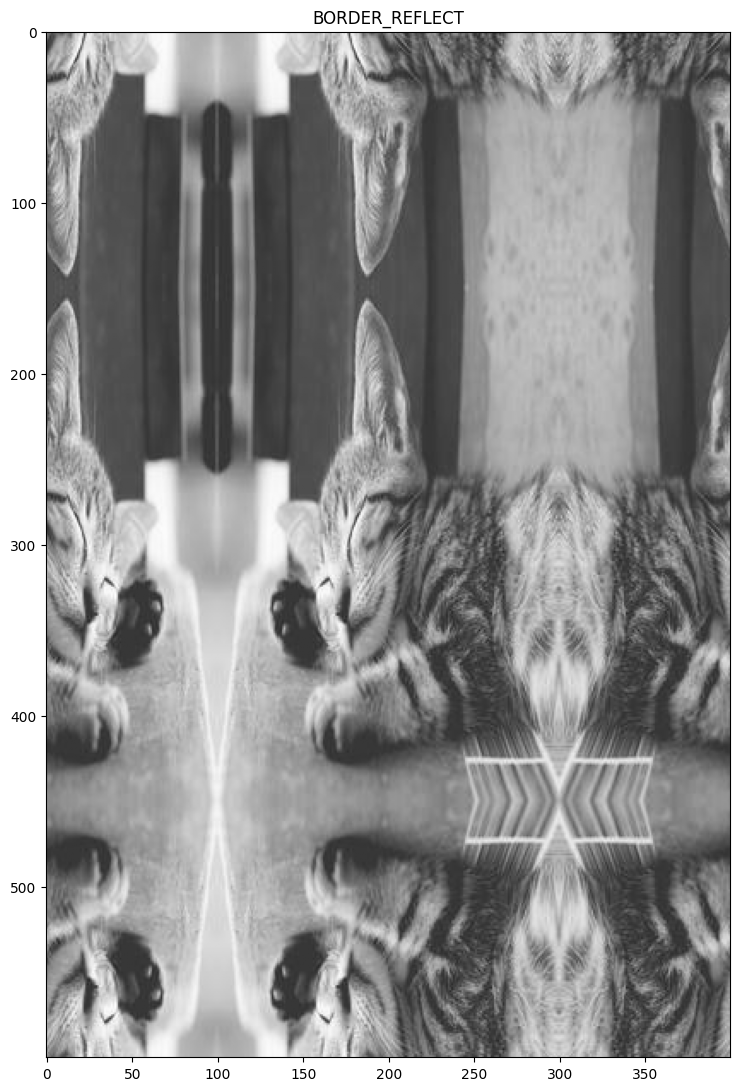

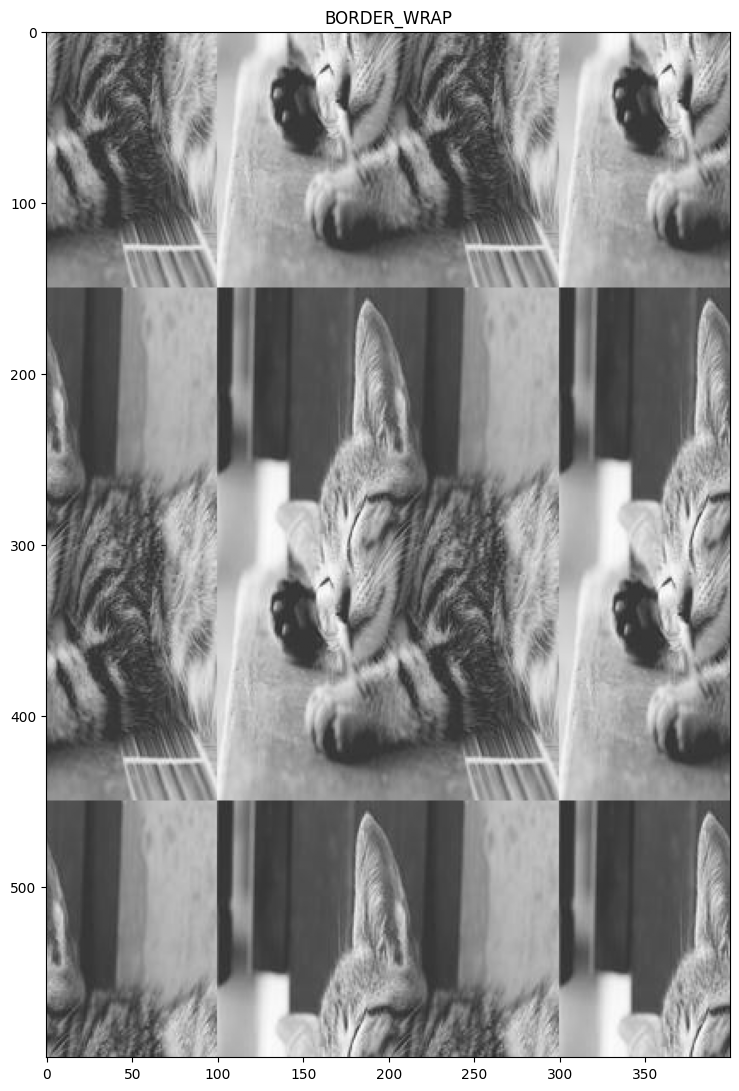

In [4]:
from random import randint

#Ejemplos de modificacion
borderType = ['BORDER_CONSTANT', 'BORDER_REPLICATE', 'BORDER_REFLECT', 'BORDER_WRAP']
borderTypeN = [0, 1, 2, 3]
top = int(.5 * img.shape[0])
bottom = top
left = int(.5 * img.shape[1])
right = left

value = [randint(0, 255), randint(0, 255), randint(0, 255)]
for k in borderTypeN:
  dst = cv2.copyMakeBorder(img, top, bottom, left, right, k, None, value)
  plt.figure(figsize=[30,30])
  plt.subplot(131),plt.imshow(dst, cmap='gray', vmin=0, vmax=255)
  plt.title(borderType[k])
  plt.show

#Aplicando libreria CV2 para funfiones de filtrado

## Blur

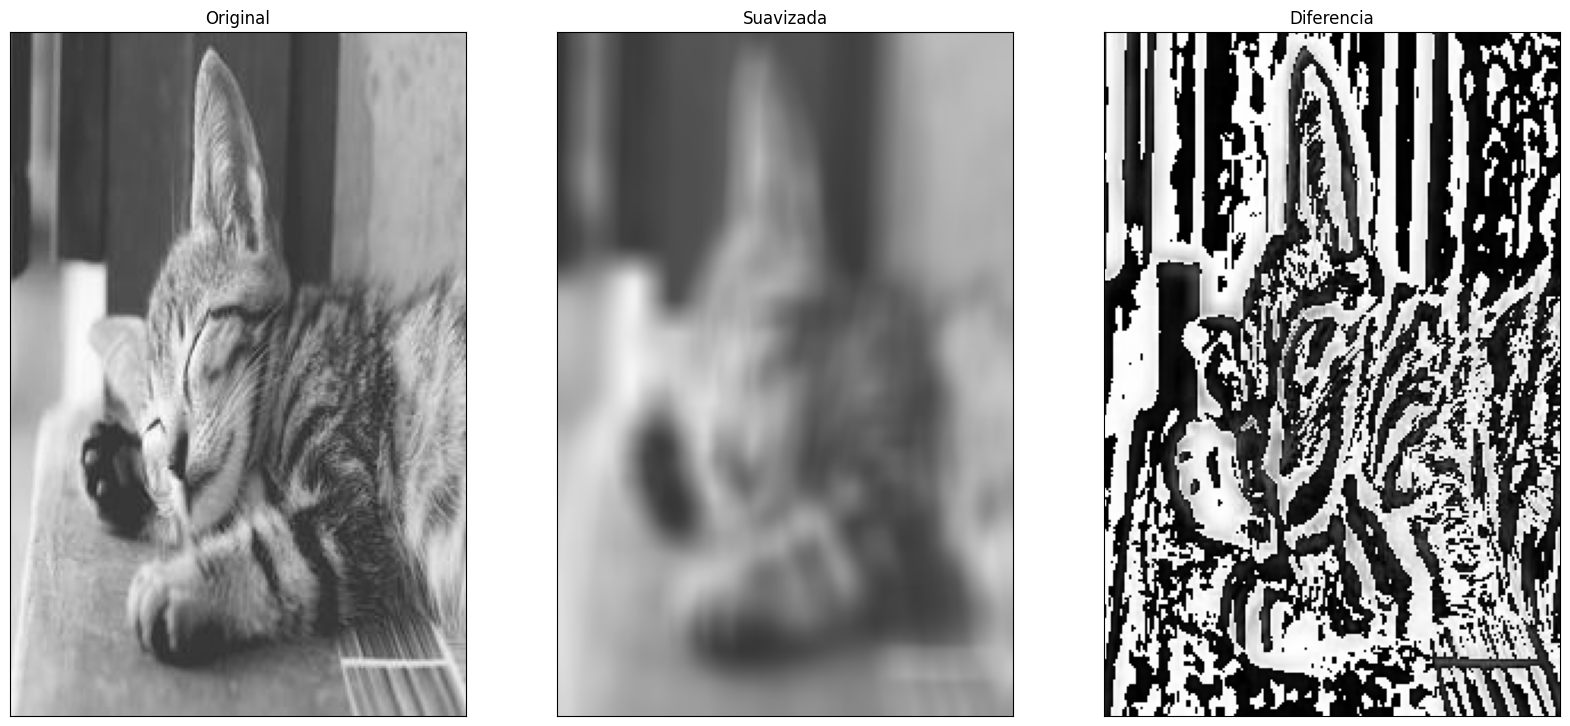

In [5]:
kernel_size=15
blurA = cv2.blur(img,(kernel_size,kernel_size))

grafica3img(img, blurA)

# Métodos para detectar bordes usando la primera derivada

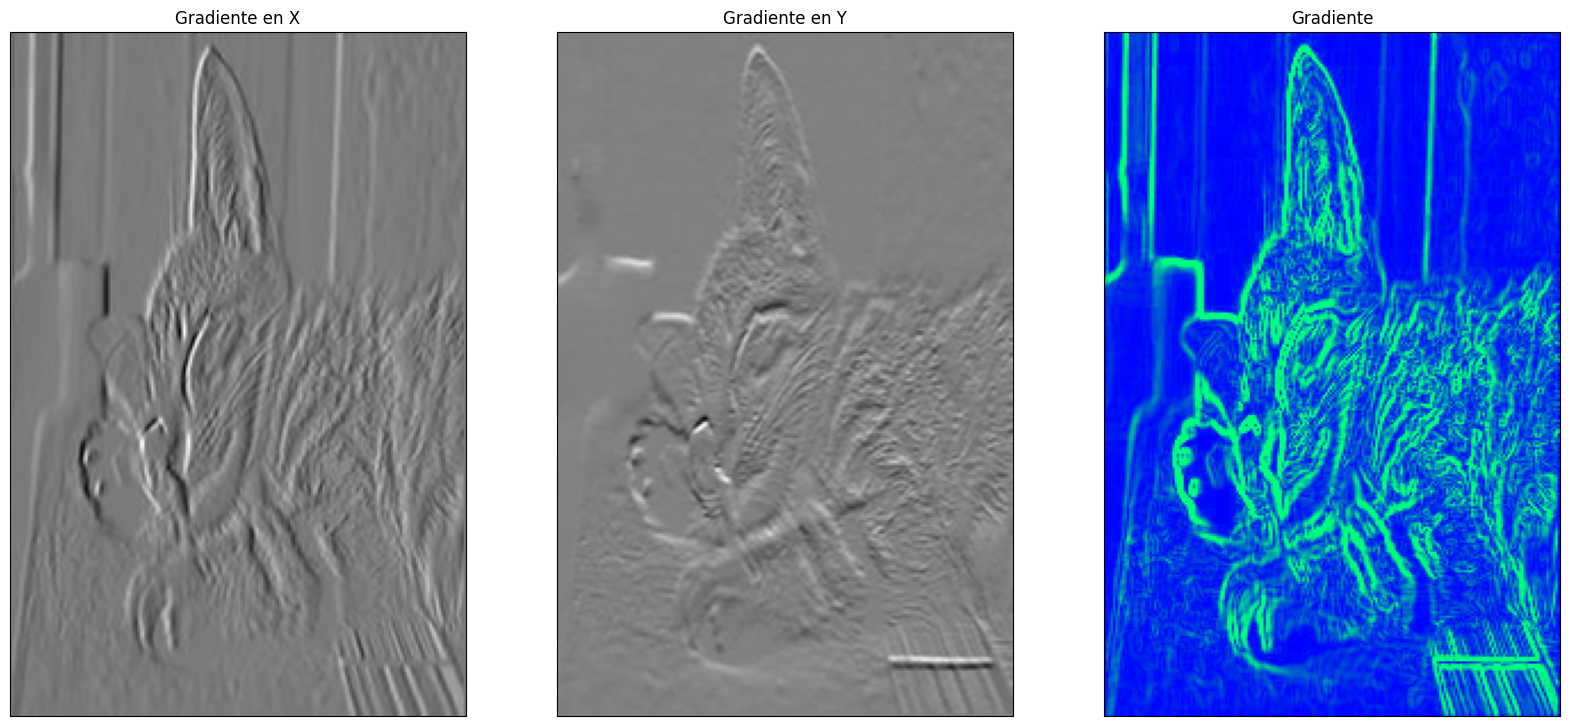

In [10]:
import random

scale = 1
delta = 0
ddepth = cv2.CV_16S

grad_x = cv2.Sobel(img, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

grad_y = cv2.Sobel(img, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)


abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)


grad = cv2.addWeighted(abs_grad_x, 1, abs_grad_y, 1, 0)

plt.figure(figsize=[20,20])
plt.subplot(131),plt.imshow(grad_x, cmap='gray', vmin=grad_x.min(), vmax=grad_x.max())
plt.title('Gradiente en X')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(grad_y,cmap='gray', vmin=grad_y.min(), vmax=grad_y.max()),
plt.title('Gradiente en Y')
plt.xticks([]), plt.yticks([])
mapas = ['Blues', 'twilight', 'plasma', 'flag', 'bone', 'summer', 'winter', \
         'cool', 'Wistia','hot', 'afmhot', 'gist_heat', 'copper','PiYG', \
         'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink','spring', 'autumn']
idx = random.randint(0, len(mapas)-1)
plt.subplot(133),plt.imshow(grad,cmap='winter', vmin=grad.min(), vmax=grad.max()),
plt.title('Gradiente')
plt.xticks([]), plt.yticks([])
plt.show()

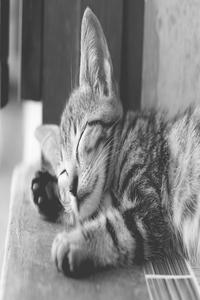

In [11]:
cv2_imshow (img)

# Distintos modificadores de contraste
Del lado derecho muestro el histograma de imagen para cada muestra

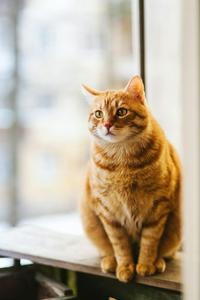

In [17]:
url = "https://placekittens.com/200/300"


url_response = urlopen (url)
img_array = np.asarray(bytearray(url_response.read()), dtype="uint8")
img = cv2.imdecode (img_array, cv2.IMREAD_COLOR)

cv2_imshow (img)


El **intervalo dinámico** representa la diferencia entre valores "más claros" y valores "más oscuros" con los cuales se puedee representar en una imagen. Típicamente, una imagen digital se representa con valores enteros entre 0 (negro) y 255 (blanco), los valores intermedios se consideran como grises.

El **aumento de contraste** se refiere a incrementar el **intervalo dinámico**  para que abarque el intervalo de intensidad completo de acuerdo al tipo de dato con el cual se puede representar la imagen.


Funcion:

$$g(x)=\alpha f(x)+ \beta$$

los parámetros $\alpha>0$ y $\beta$ están relacionados con el control del contraste y el brillo, respectivamente.

<ipython-input-19-37067bb4a56a>:25: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(1,2,2), plt.hist(gray.ravel(),256,[0,256])


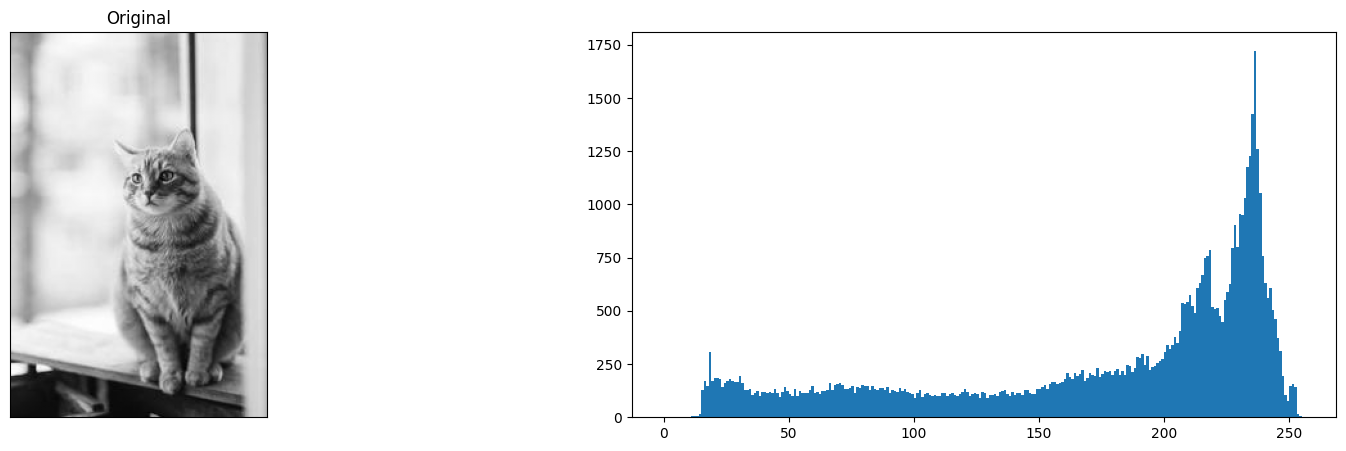

<ipython-input-19-37067bb4a56a>:37: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(1,2,2), plt.hist(new1.ravel(),256,[0,256])


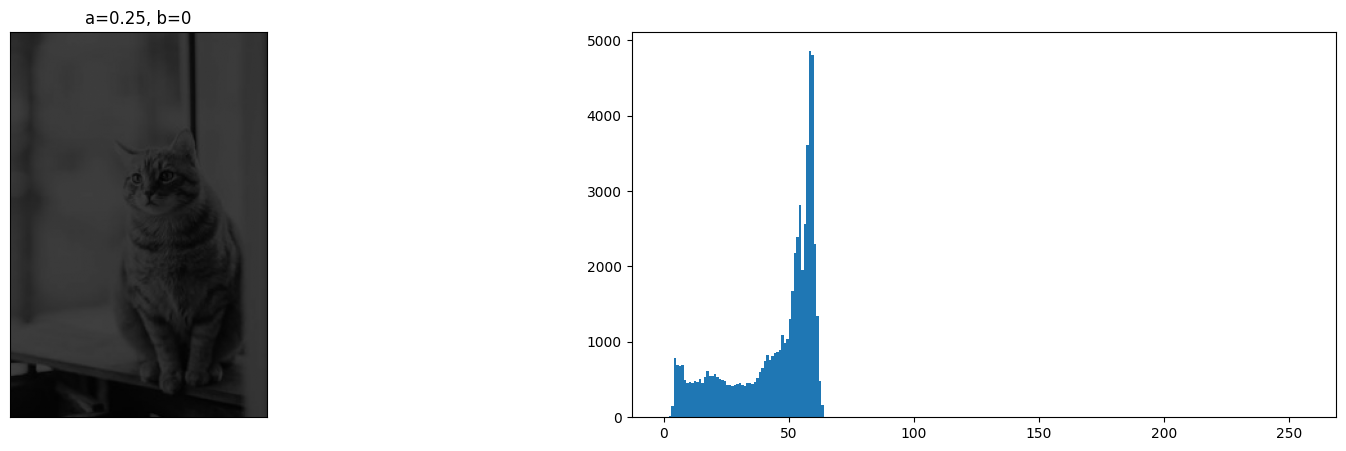

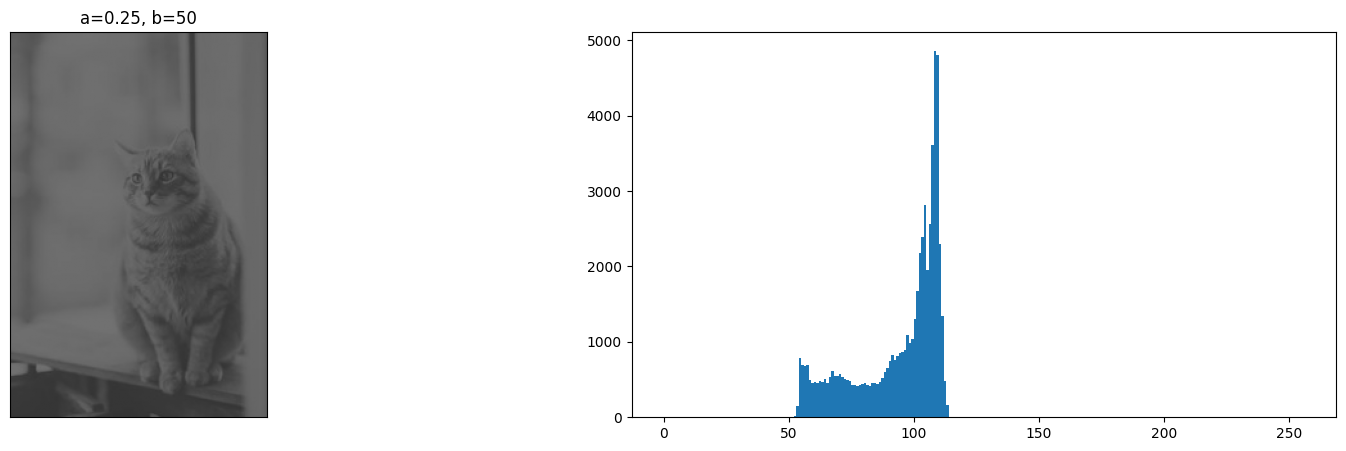

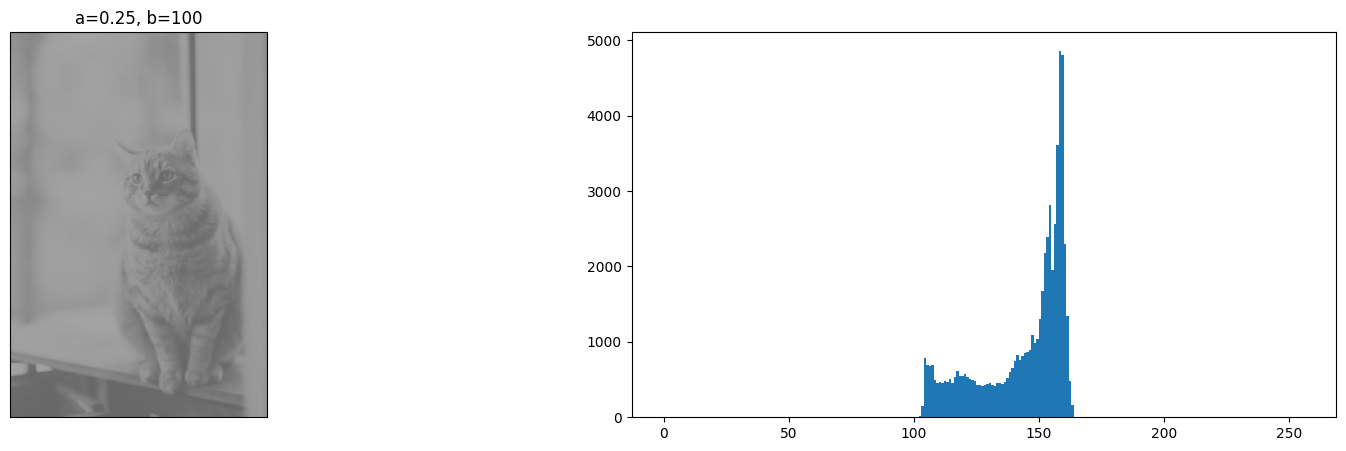

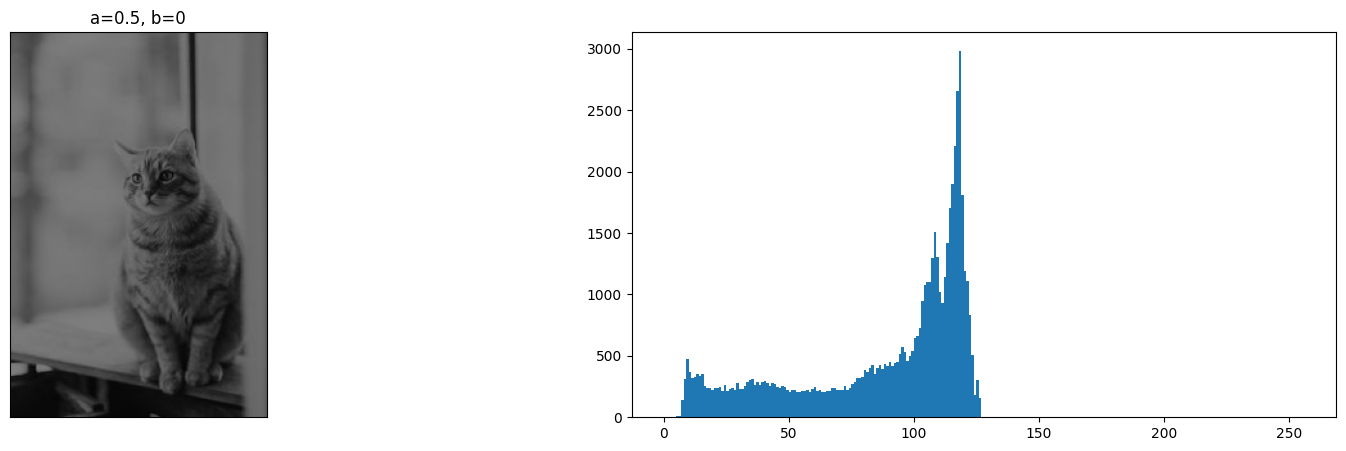

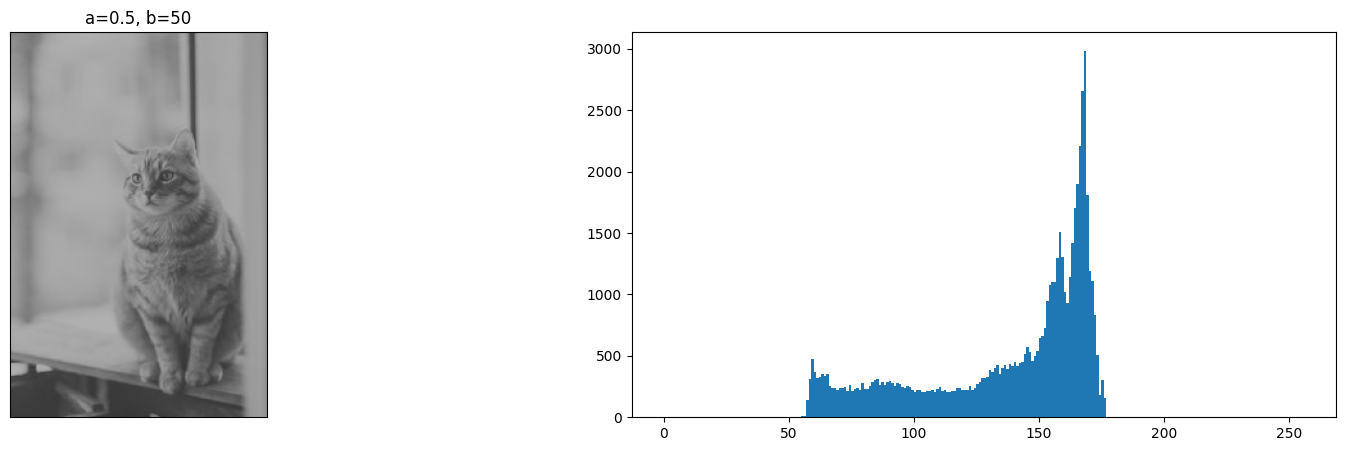

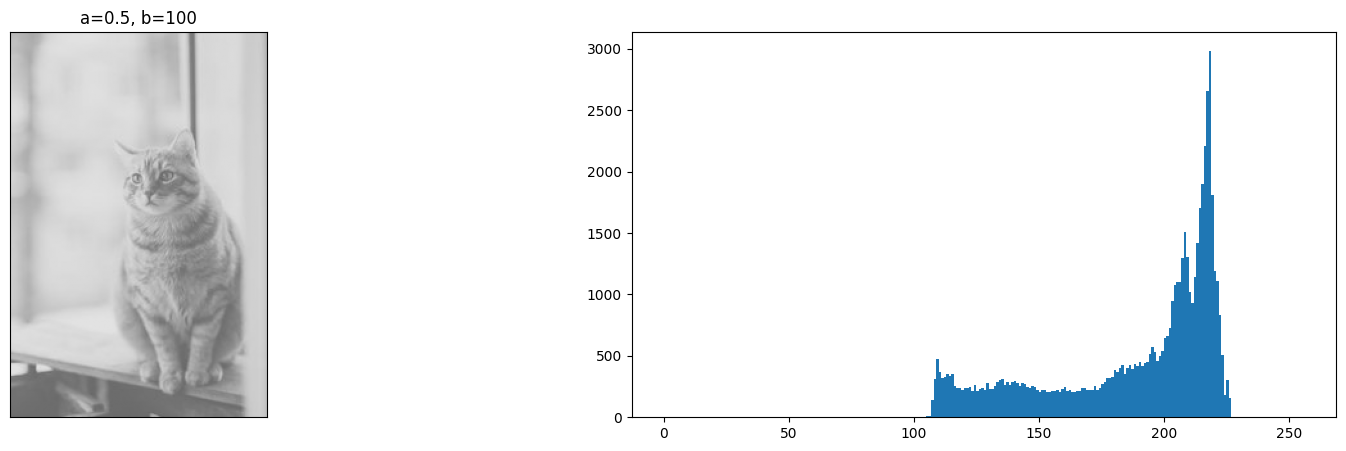

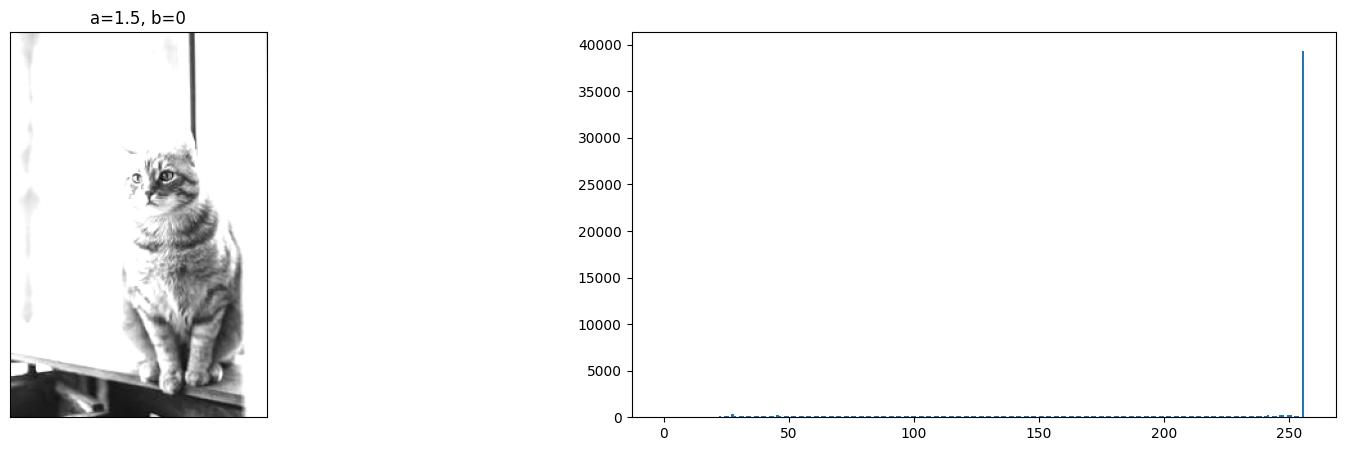

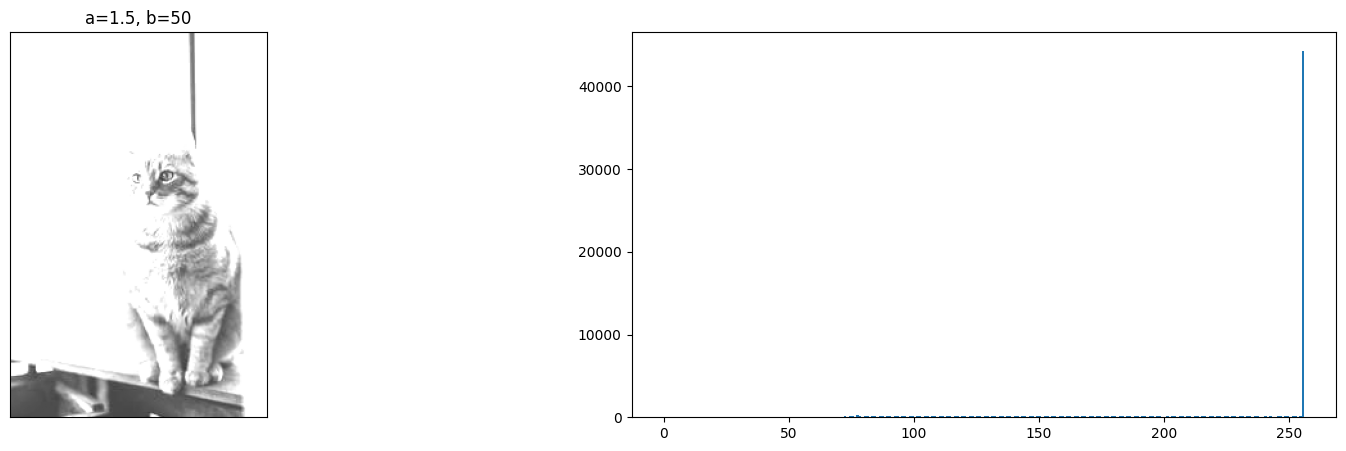

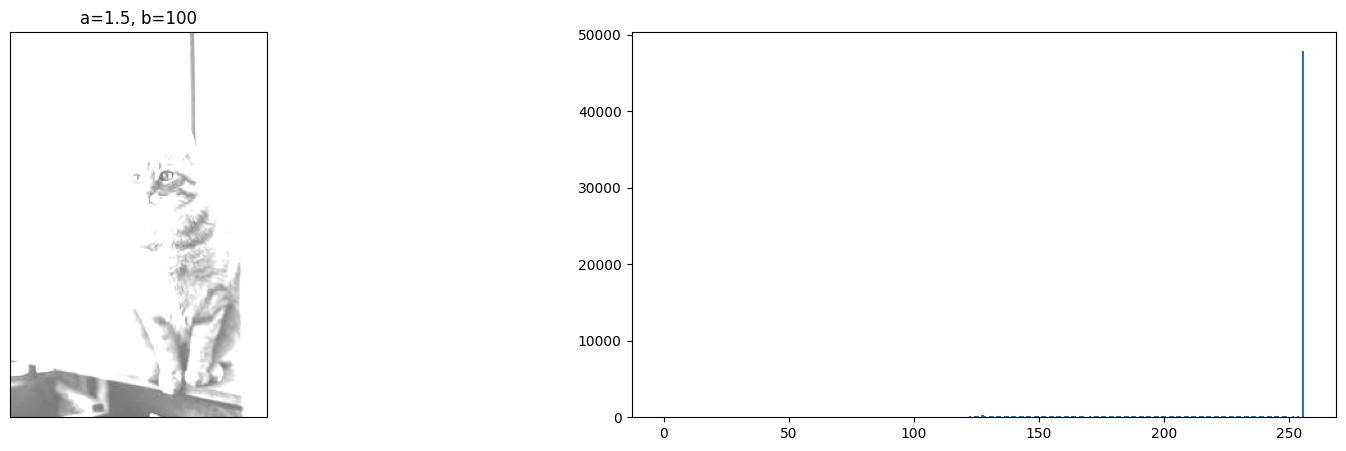

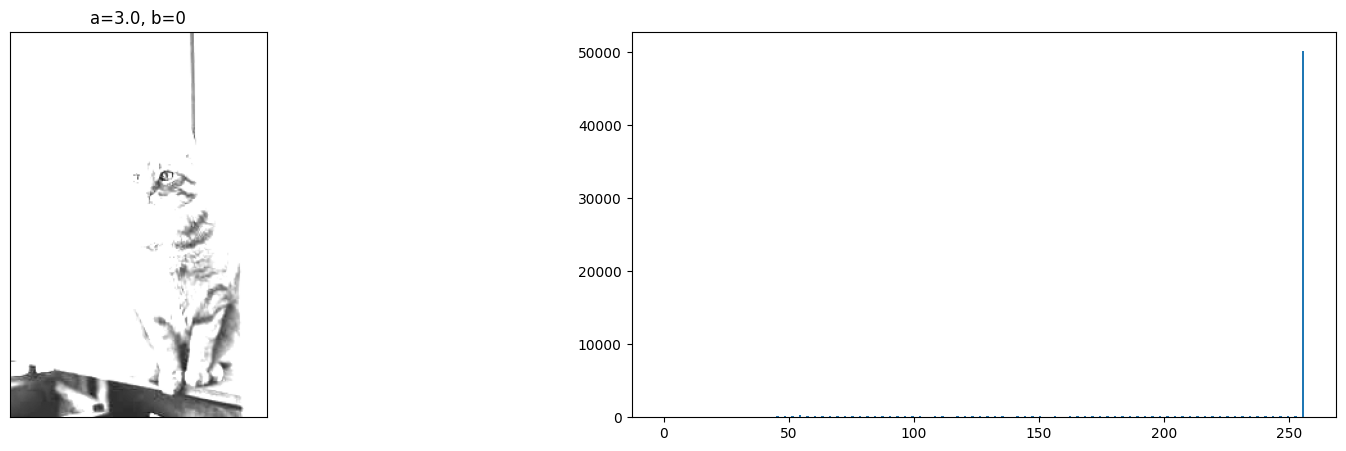

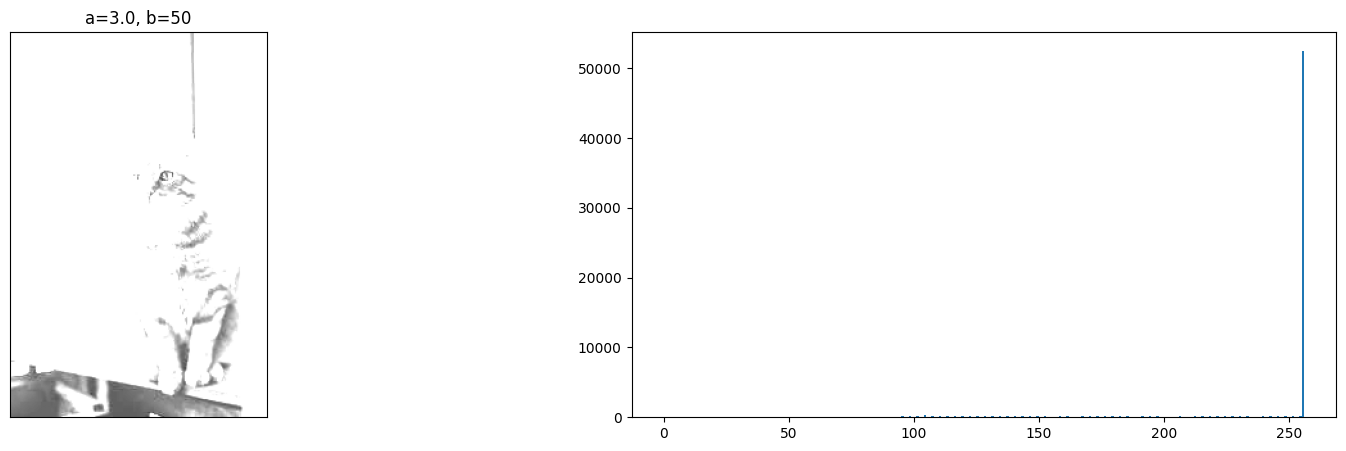

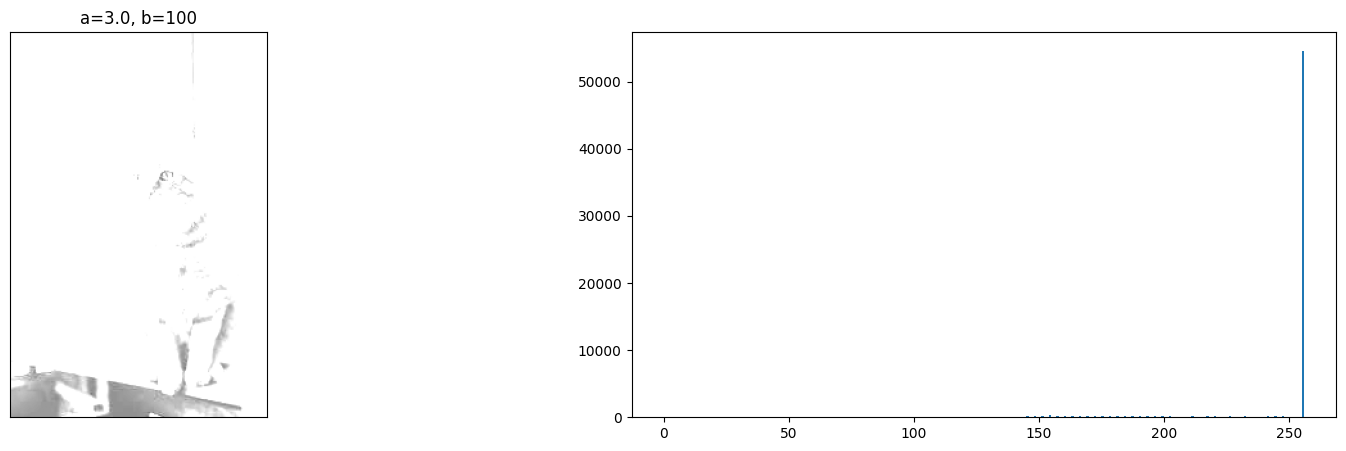

In [19]:
def opExtension(img):
  # el operador de extension, escala intervalo dinámico para que resulte entre 0 y 255
  min = img.min() # valor mínimo en la imagen de entrada
  max = img.max()
  res = 255 * (img - min) / (max - min)
  return res

def opExtension2(img, t1, t2):
  # el operador de extension, escala intervalo dinámico para que resulte entre 0 y 255
  min = t1 # valor mínimo en la imagen de entrada
  max = t2
  res = 255 * (img - min) / (max - min)
  return res


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


alpha = [0.25, .5, 1.5, 3.]
beta  = [0, 50, 100]

plt.figure(figsize=([20, 5]))
plt.subplot(1,2,1),plt.imshow( gray , cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.hist(gray.ravel(),256,[0,256])
plt.show()

for a in alpha:
  for b in beta:

    new1 = np.clip(a*gray + b, 0, 255)


    plt.figure(figsize=([20, 5]))
    plt.subplot(1,2,1),plt.imshow( new1 , cmap='gray', vmin=0, vmax=255 )
    plt.title('a='+str(a)+', '+'b='+str(b)), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2), plt.hist(new1.ravel(),256,[0,256])
    plt.show()


### En la salida anterior se puede mostrar el efecto de los valores  $\alpha$ y $\beta$